In /Users/markyang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/markyang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/markyang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/markyang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/markyang/opt/anaconda3

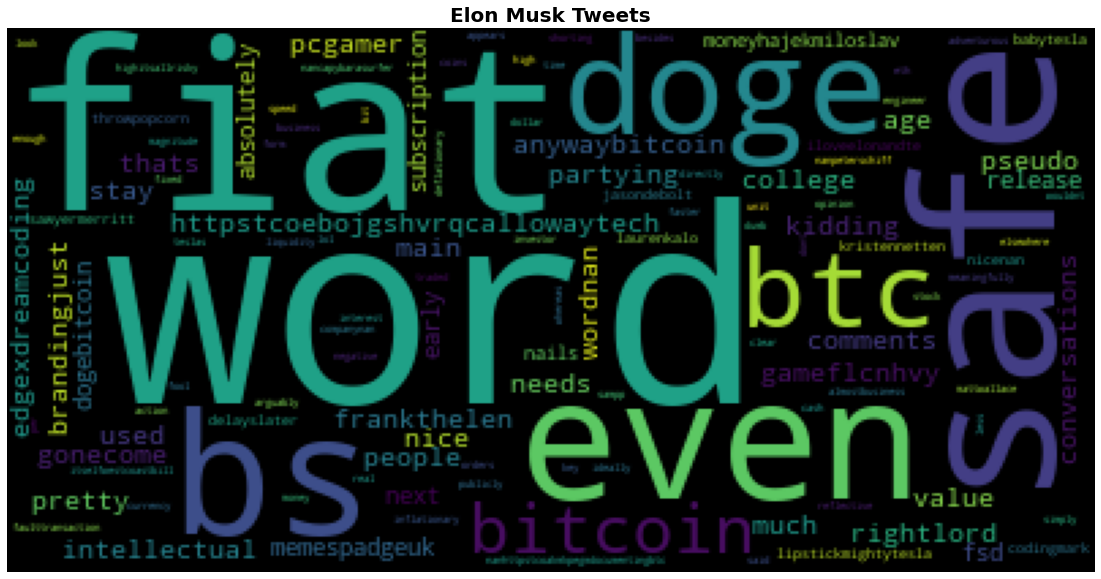

In [1]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re
import pandas as pd
from nltk.corpus import reuters, stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


## -------BTC WordCloud-------
# Read and process BTC file
df2=pd.read_pickle("data/elon_btc.plk")
df2 =df2.rename(columns={"Elon Musk's Tweet That Mentions the Word Bitcoin or BTC": "elon_text_BTC"})
df2["elon_text_BTC"] = df2["elon_text_BTC"].apply(str)

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Set corpus
corpus = df2["elon_text_BTC"]

# Define function to process text
def process_text(elon_text_BTC):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', elon_text_BTC)  # what is doc
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase  
    sw_addon = {'nannan', 'almost', 'tesla','yearone','amp','seem','memospadgeuk','hanging','great','sounds','witcher','need','indeed'}
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    #output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

# Process input text for WordCloud
big_string = ' '.join(corpus)
input_text = process_text(big_string)

# Generate the BTC WordCloud
wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Elon Musk Tweets", fontdict=fontdict)

# Save BTC image
from path import Path
filepath=Path("image/wordcloud_bitcoin.png")
wc.to_file(filepath)


## -------Doge WordCloud-------
# Read and process Doge file
df1= pd.read_pickle("data/elon_doge.plk")
df1 =df1.rename(columns={"Elon Musk's Tweet That Mentions the Word DOGE": "elon_text_doge"})
df1["elon_text_doge"] = df1["elon_text_doge"].apply(str)

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Set corpus
corpus = df1["elon_text_doge"]

# Define function to process text
def process_text(elon_text_doge):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', elon_text_doge)  # what is doc
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    # We can define our own list of stopwords to add to the default nltk words
    sw_addon = {'nan', 'kerosene', 'wa','amp','grimezsz','erdayastronaut','rweb','imo','matter','much'}
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    #output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

# Process input text for WordCloud
big_string = ' '.join(corpus)
input_text = process_text(big_string)

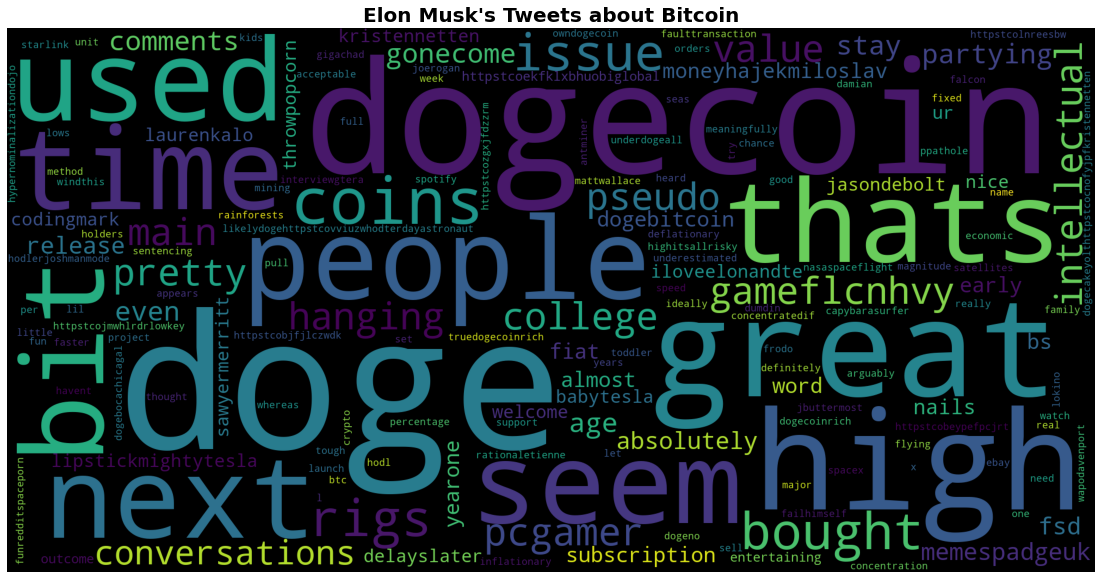

In [12]:
# Generate the Doge WordCloud
wc = WordCloud(width=2000, height=1000).generate(input_text)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Elon Musk's Tweets about Bitcoin", fontdict=fontdict)

# Save Doge image
from path import Path
filepath=Path("image/wordcloud_doge.png")
wc.to_file(filepath)